# Exploring data on prompt #2 ( the first Notebook) 

Author: Biljana(Billie) Rolih


###Data Sets
+ testing data set: from year 2013
+ ca_doj_arrests_deidentified_2013_05-07-2016.csv

2. Look at year: 2013


## Observations for the Department of Justice project
    + Gender breakdown male/female arrests:
        + adults: 76/24 %
        + juvies: 73/27 %
        + juveniles have a slightly higher percentage of female arrests

    + Juveniles:
Looking at raw numbers, far more Hispanics are being arrested than any other group. However at the police station they are not being treated as harshly as Blacks. Black juveniles  are the only ethnic group being booked more often than being cited. From plot #2: Black Juveniles are being booked about 53% of the time, while being cited about 33% of the time. Hispanic Juveniles are being cited slightly more often (41% of the time) than being booked (40%).  Asian Juveniles are by far the least likely to be booked (28% of the time), and are cited about as often as white juvies (48% and 49% respecitvely). White juveniles are slightly more likely to be booked than Asian juveniles (34%). All other ethnic groups, are experiencing roughly the same treatment as white juveniles. 

## Do Next
+ create png files of the plots
+ put on README on git
+ look at BCS codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [ ]:
##################### only applies when working in AzureML workspace ###################
#Load DOJ arrests data from AzureML Datasets
#from azureml import Workspace
#ws = Workspace()
#ds = ws.datasets['ca_doj_arrests_deidentified_2013_05-07-2016.csv']
#frame = ds.to_dataframe()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
frame = pd.read_csv('../data/ca_doj_arrests_deidentified_2013_05-07-2016.csv')


In [4]:
frame.head(3)

,county,agency_name,agency_code,arrest_year,arrest_month,arrest_day,race_or_ethnicity,gender,age_group,summary_offense_level,offense_level,bcs_offense_code,bcs_summary_offence_code,fbi_offense_code,status_type,disposition
0,Alameda,Alameda Co. Sheriff's Department,100,2013,1,1,White,male,adult,felony,felony,372,6,04,booked,felony complaint sought
1,Alameda,Alameda Co. Sheriff's Department,100,2013,1,1,Hispanic,male,adult,felony,felony,372,6,04,booked,felony complaint sought
2,Alameda,Alameda Co. Sheriff's Department,100,2013,1,1,Hispanic,male,adult,felony,felony,320,6,04,booked,felony complaint sought


In [4]:
# Exploring the 
test = frame[['arrest_month', 'arrest_day']]
frame['race_or_ethnicity'].unique()
frame['age_group'].unique()
frame[ 'status_type'].unique()
frame['summary_offense_level'].unique()

array(['felony', 'misdemeanor', 'juvenile'], dtype=object)

**questions**: 
___                      
***                
**'offense_level**:, what is 'status offense'?  
 ** summary_offense level** : felony v. misdemeanor v. juvenile 
 **disposition**


what happens after arrest?
***

In [5]:
frame['disposition'].unique()

array(['felony complaint sought', 'misdemeanor complaint sought',
       'released', 'referred to juvenile probation department',
       'handled within department', 'turned over to other agency'], dtype=object)

In [7]:
# these two, same thing:
frame.loc[:,['offense_level']].groupby('offense_level').size().order(ascending=False)
frame.offense_level.value_counts()

misdemeanor       750985
felony            442741
status offense     11810
Name: offense_level, dtype: int64

In [6]:
########### GENDER BREAKDOWN: ADULT ONLY ################

adult_df = frame[frame['age_group']=='adult']

adult_m = 100*float(adult_df.gender[adult_df.gender =='male'].count() )/ float(adult_df.gender.count())
adult_f = 100*float(adult_df.gender[adult_df.gender =='female'].count() )/ float(adult_df.gender.count())

print("% of male adult arrests {}% ". format(round(adult_m)))
print("% of female adult arrests {}% ". format(round(adult_f)))

% of male adult arrests 76.0% 
% of female adult arrests 24.0% 


### How to Classify HARSH vs. LENIENT punishment?  
1. group ** Offense Level** ('felony', u'misdemeanor', u'juvenile') by ethnicity
2. What happens after the arrest? There is a category ** status_type**
    + what group gets "booked" (bad) vs. "cited" (good/better?)
    + are there 
---
** 1,108,599 adults vs. 96,937 juveniles **
(1.1 Mil, vs. just under 97 thousand)

---

# df= dataframe for juvenile group
### ethnic_group : Dataframe of .counts() of df, grouped by race/status_type**
+ what is the % breakdown of male/female juvenile arrests? 
    + adults: 76/24
   + juvies: 73/27
    

In [60]:
df = frame[frame['age_group']=='juvenile']

In [61]:
########### GENDER BREAKDOWN ################
juv_m = 100*float(df.gender[df['gender']=='male'].count())/float(df.gender.count())
juv_f =100*float(df.gender[df['gender']=='female'].count())/float(df.gender.count())
print( "% male juveniles is: {}%".format(round(juv_m)))
print( "% female juveniles is: {}%".format(round(juv_f)))

% male juveniles is: 73.0%
% female juveniles is: 27.0%


In [9]:
#df['race_or_ethnicity'].value_counts()

In [62]:
# remove the values for unknown/ suppressed ethnicity
# work with a smaller DataFrame

df = df[df.race_or_ethnicity !='suppressed_due_to_privacy_concern']
df_status =df[['race_or_ethnicity','status_type','gender']]#, 'disposition'

In [63]:
#group smaller ata frame by RACE/STATUS
group_disp=df_status.groupby(['race_or_ethnicity','status_type'])
ethnic_group = group_disp.count().unstack()
ethnic_group

gender             
status_type            booked  cited other
race_or_ethnicity                         
Asian/Pacific Islander    634   1099   555
Black                    8299   5144  2300
Hispanic                16253  16578  7236
Other                     816   1142   331
White                    5167   5964  3036

+ I now have a **multi-index DATAFRAME** 
+ level 0 = 'gender' for all columns
+ level 1 = 'booked' 'cited' and 'other' 

In [64]:
# can I remove the "gender level" 
ethnic_group.columns.get_level_values(0)
ethnic_group.columns.get_level_values(1)

Index([u'booked', u'cited', u'other'], dtype='object', name=u'status_type')

In [65]:
## Reduce the number of **LEVELS** in DF
ethnic_group = ethnic_group.gender
ethnic_group

status_type,booked,cited,other
race_or_ethnicity,,,
Asian/Pacific Islander,634,1099,555
Black,8299,5144,2300
Hispanic,16253,16578,7236
Other,816,1142,331
White,5167,5964,3036


In [14]:
ethnic_group.info

<bound method DataFrame.info of status_type             booked  cited  other
race_or_ethnicity                           
Asian/Pacific Islander     634   1099    555
Black                     8299   5144   2300
Hispanic                 16253  16578   7236
Other                      816   1142    331
White                     5167   5964   3036>

## Plot1: 

In [66]:
############ Variables for plot #########
    ## Long way of doing it
    #xlabel = [str(a) for a in ethnic_group.index.unique()]
xlabel=list(ethnic_group.index)
# Add Newline character to Pacific Islander so it labels better
xlabel[0]="Asian/\nPacific Islander" 

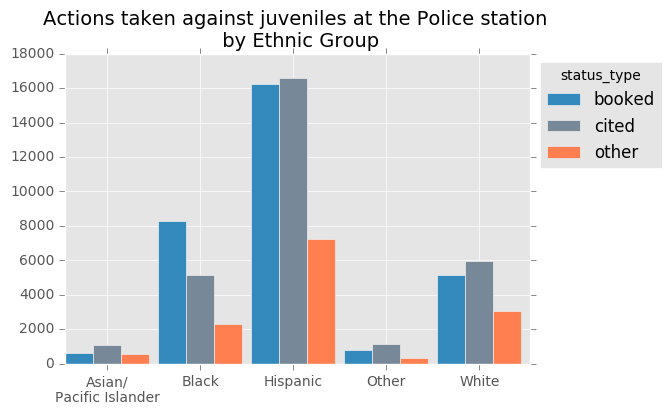

In [67]:
############## Plot 1 ####################
#mpl.style.use('fivethirtyeight') 
mpl.style.use('ggplot') 


x = np.arange(0, ethnic_group.index.unique().size)
wid=0.3

fig, ax = plt.subplots()
# ethnic group as labels on bar PLOT
#xlabel= [str(a) for a in ethnic_group.index.unique()]

plt.bar(x, ethnic_group.booked, wid, label='booked') # bar plot + move to right for better visibility
# put labels on bar graph 
plt.bar(x+wid, ethnic_group.cited, wid, label='cited', color='lightslategrey')
plt.bar(x+ 2*wid, ethnic_group.other, wid, label='other', color='coral')

plt.xticks(x + 1.5*wid, xlabel)
ax.legend(bbox_to_anchor=(1.3, 1.0), title='status_type')
plt.title('Actions taken against juveniles at the Police station \n by Ethnic Group'
         ,fontsize=14)
plt.show()

**A few observations on the data**
Looking at the preliminary data, it appears as if arrested Black juveniles get booked at disproportionally higher rates than other ethnic groups. It is the only group that has more 'booked' statuses than mere citations </br>
+ plot percentages:
+ to put the actions booked/cited on the same scale
+ what about gender? is there discrepancy in books/cited action in gender across the ethnic groups

In [20]:
####### create a NEW dataFrame using .copy ##############
stat_p = ethnic_group[['booked']].copy()

#rename a column
#stat_p =stat_p.rename(columns={'booked': 'booked %'})

stat_p[['cited %]] = ethnic_group[['cited']].copy()
stat_p[['other %']] = ethnic_group[['other']].copy()

## New DataFrame of % of status type, by ethnic group
+ if you don't change the total sum, in each row, can use groupby
    + like here : http://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
+ but since I"m doing it as a % of each group
+ DO NEED a for loop possibly 


In [85]:
###### testing ######
# if you don't change the overall sum 
#stat_p[['booked']].apply(lambda x:100*x/ethnic_group.booked.sum())

In [68]:
############ 1 way of doing %ages ###############

cols = list(ethnic_group.columns)
asian_p = []; black_p = []; hisp_p = []; other_p = [] ;white_p = []

def percent_status(e_group, mylist):
    for a in ethnic_group.loc[e_group]:
        mylist.append( 100*float(a) / float(ethnic_group.loc[e_group].sum()))
    return mylist
   
asian = percent_status(list(ethnic_group.index)[0], asian_p)
black = percent_status(list(ethnic_group.index)[1], black_p)
hisp  = percent_status(list(ethnic_group.index)[2], hisp_p)
other = percent_status(list(ethnic_group.index)[3], other_p)
white = percent_status(list(ethnic_group.index)[4], white_p)

In [69]:
############## Create DataFrame of percentages ##############
    # using .from_items
status_percent = pd.DataFrame.from_items([('Asian/Pacific Islander', asian), ('Black', black),
                                         ('Hispanic', hisp), ('Other',other), ('White',white)]
                              ,orient='index', columns=['booked %', 'cited % ', 'other %'] )

In [70]:
status_percent = status_percent.round(2)
status_percent['booked %']

Asian/Pacific Islander    27.71
Black                     52.72
Hispanic                  40.56
Other                     35.65
White                     36.47
Name: booked %, dtype: float64

## bar plot of status_type percentages, grouped by ethnic group

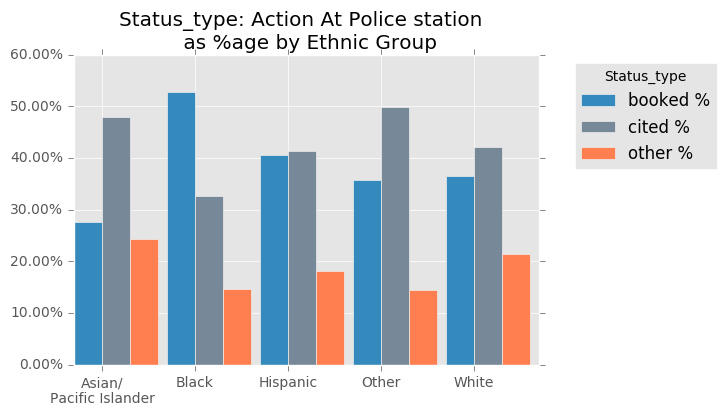

In [71]:
xlabel = list(status_percent.index)
xlabel[0] = "Asian/\nPacific Islander"

############## Plot 2 ####################
x = np.arange(0, status_percent.index.unique().size)
wid=0.3

fig, ax = plt.subplots()

ax.bar(x, status_percent['booked %'], wid, label='booked %')
ax.bar(x+wid, status_percent['cited % '], wid, label='cited %', color='lightslategrey')
ax.bar(x+wid+0.3, status_percent['other %'], wid, label='other %', color='coral')

ax.legend(bbox_to_anchor=(1.4,1), title='Status_type')

############### add labels to BARS on X-axis #################
    # remember to add to pyplot object (AxesSubplot' object has no attribute 'xticks')
plt.xticks(x+wid, xlabel)

############### format Y-Axis as Percentage ###############
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x) for x in vals])

plt.title("Status_type: Action At Police station  \n as %age by Ethnic Group")
plt.show()

** Observations ** <br>
More than 50% of all Black Juveniles are booked when in Police Custody, which is arguably the harshest punishment. It's unclear(?) what 'Oher' means, but it applies most to Asian/Pacific Islander and White Juveniles. 
The highest rate of Cited status applies to Asian and other, ethnic groups. 

## As a percentage of total status_type categories, booked, cited etc ** 

In [72]:
stat_type_sum = [ethnic_group[a].sum() for a in ethnic_group.columns]
stat_type_sum # sum of all incidents of (booking, citing, other)

[31169, 29927, 13458]

In [75]:
print (ethnic_group.loc['Hispanic', 'other']) 
print ("Hispanic: {} % ".format( float (ethnic_group.loc['Hispanic', 'other'])/ethnic_group.other.sum()) )

7236
Hispanic: 0.537672759697 % 


In [76]:
ethnic_group


status_type,booked,cited,other
race_or_ethnicity,,,
Asian/Pacific Islander,634,1099,555
Black,8299,5144,2300
Hispanic,16253,16578,7236
Other,816,1142,331
White,5167,5964,3036


In [77]:
############ 2nd way of doing %ages ###############
    # Note: Stat_p, is a new DF 
stat_p = ethnic_group[['booked']].apply(lambda x:100*x/float(ethnic_group.booked.sum()))
stat_p['cited %']= ethnic_group[['cited']].apply(lambda x:100*x/float(ethnic_group.cited.sum()))
stat_p['other %']= ethnic_group[['other']].apply(lambda x:100*x/float(ethnic_group.other.sum()))
stat_p = stat_p.rename(columns={'booked': 'booked %'})

In [78]:
## Round to two decimal points + transpose
stat_p =stat_p.round(2).transpose()
stat_p

race_or_ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
status_type,,,,,
booked %,2.03,26.63,52.14,2.62,16.58
cited %,3.67,17.19,55.39,3.82,19.93
other %,4.12,17.09,53.77,2.46,22.56


Note that black youths make up ____ % of all arrests, however make up 26.6% of all youths who are booked 

In [66]:
#### what is enumerate? very very useful! ### 
#stat_p.loc[str(xlabel[0])]
#for a in range(0, len(list(stat_p.columns)) ):
    #print stat_p[ylabel[a]]
    
for a, b in enumerate(list(stat_p.columns)):
    print a, b

0 Asian/Pacific Islander
1 Black
2 Hispanic
3 Other
4 White


### bar plot of status_type percentages, grouped by status_type

In [79]:
colors = ['royalblue', 'coral', 'seagreen', 'tan','teal' ]

In [88]:
stat_p

race_or_ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
status_type,,,,,
booked %,2.03,26.63,52.14,2.62,16.58
cited %,3.67,17.19,55.39,3.82,19.93
other %,4.12,17.09,53.77,2.46,22.56


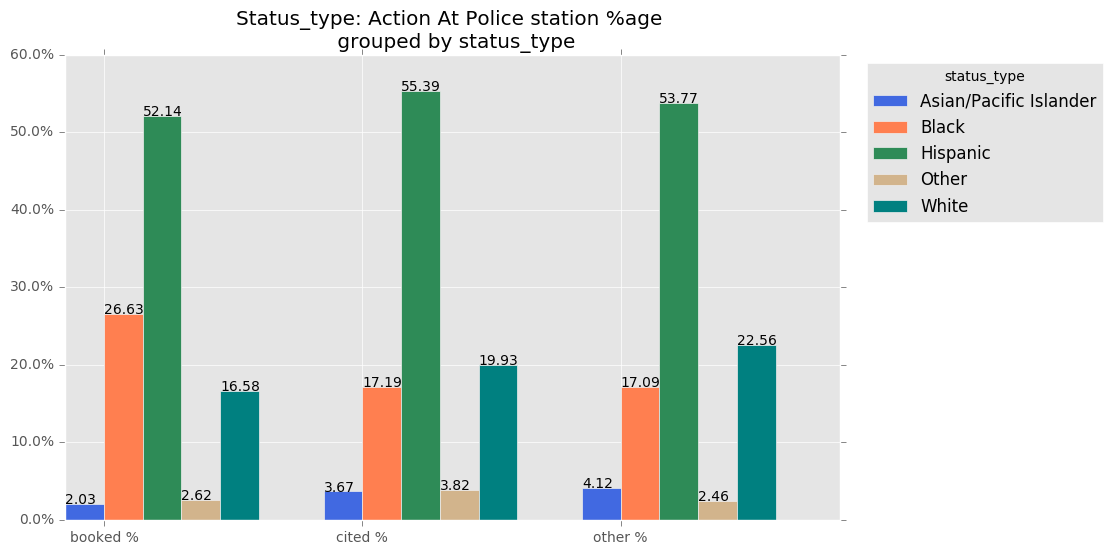

In [94]:
ylabel = list(stat_p.columns)
xlabel = list(stat_p.index)

############## Plot 3 ####################
x = np.arange(0, stat_p.index.unique().size)
wid=0.15

fig, ax = plt.subplots(figsize=(10,6))

##################  METHOD 1: bar plots of the columns of stat_p ###
#for a in range(0, len(list(stat_p.columns)) ):
    # ax.bar(x, stat_p[ylabel[a] ], wid, label=str(ylabel[a]))
##############  METHOD 2:  
for a, b in enumerate(list(stat_p.columns)):
    ax.bar(x+(a*0.15), stat_p[b], wid, label=str(ylabel[a]), color=colors[a] )
    
ax.legend(bbox_to_anchor=(1.35,1), title='status_type')
############### add labels to BARS on X-axis #################
plt.xticks(x+wid, xlabel)

############### annotate bar plot ############### 
#ax.annotate( str(get.height))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

    
############### format Y-Axis as Percentage ###############
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])

plt.title("Status_type: Action At Police station %age \n grouped by status_type")

#### save fig ###
#plt.savefig('plot3_PercentByStatus.png', bbox_inches='tight',pad_inches=.2)
plt.show()

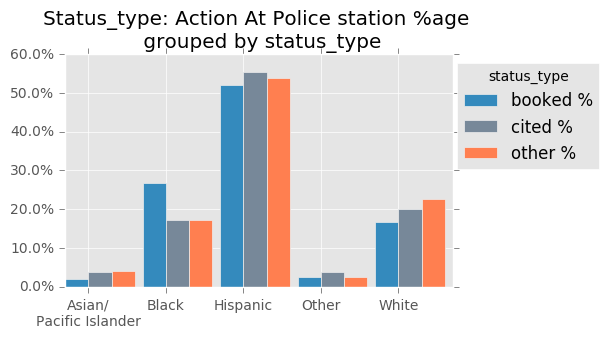

In [103]:
xlabel = list(stat_p.index); xlabel[0] = "Asian/\nPacific Islander"
############## Plot 3 (ONLY for stat_p.index = race/ethnicity,) ####################
x = np.arange(0, status_percent.index.unique().size); wid=0.3
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(x, stat_p['booked %'], wid, label='booked %')
ax.bar(x+wid, stat_p['cited %'], wid, label='cited %', color='lightslategrey')
ax.bar(x+wid+0.3, stat_p['other %'], wid, label='other %', color='coral')
ax.legend(bbox_to_anchor=(1.4,1), title='status_type')
############### add labels to BARS on X-axis #################
    # remember to add to pyplot object (AxesSubplot' object has no attribute 'xticks')
plt.xticks(x+wid, xlabel)
############### format Y-Axis as Percentage ###############
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x) for x in vals])
plt.title("Status_type: Action At Police station %age \n grouped by status_type"); plt.show()

In [32]:
################ DIFFERENTLY ORIENTED DATA FRAME ##############
# I end up not using this data frame
status_df = group_disp.count().unstack(level=0)
status_df = status_df.gender

In [ ]:
########### GENDER BREAKDOWN ################
juv_m = 100*float(df.gender[df['gender']=='male'].count())/float(df.gender.count())
juv_f =100*float(df.gender[df['gender']=='female'].count())/float(df.gender.count())
print( "% male juveniles is: {}%".format(round(juv_m)))
print( "% female juveniles is: {}%".format(round(juv_f)))

## Total number of arrests made
(in Azure Notebook) 
For Juveniles, what % of all arrests made for each ethnic group? 

In [34]:
#df.race_or_ethnicity=='Black'
df.age_group.unique()

array(['juvenile'], dtype=object)

In [42]:
ethnic_vals = list(df.race_or_ethnicity.value_counts())
ethnic_list = list(df.race_or_ethnicity.value_counts().index)
print (ethnic_vals)
print (ethnic_list)

[40067, 15743, 14167, 2289, 2288]
['Hispanic', 'Black', 'White', 'Other', 'Asian/Pacific Islander']


In [57]:
df.race_or_ethnicity.value_counts()

Hispanic                  40067
Black                     15743
White                     14167
Other                      2289
Asian/Pacific Islander     2288
Name: race_or_ethnicity, dtype: int64

In [95]:
arrest_p = []
for a in range(0, len(ethnic_list)): 
    arrest_p.append((100* float(ethnic_vals[a])/ float(df.race_or_ethnicity.count())) ) 


In [130]:
arrest_p = [round(a,2) for a in arrest_p]

[53.74, 21.12, 19.0, 3.07, 3.07]

In [131]:
### 1: create a tuple from arrest_p and ethnic_list
arrestP = zip(ethnic_list,arrest_p)
arrestP

[('Hispanic', 53.74),
 ('Black', 21.12),
 ('White', 19.0),
 ('Other', 3.07),
 ('Asian/Pacific Islander', 3.07)]

In [132]:
### 2: create a DataFrame from a list of tuples
arrest_df = pd.DataFrame(arrestP, columns = ("none", 'arrest %'))
arrest_df.index=arrest_df['none']
arrest_df = arrest_df.drop('none', 1 )
arrest_df = arrest_df.rename(columns={"1": "arrest %"})

In [133]:
arrest_df

,arrest %
none,
Hispanic,53.74
Black,21.12
White,19.00
Other,3.07
Asian/Pacific Islander,3.07


In [152]:
range(0, len(arrest_df.index))
xlabel[4]

'Asian/Pacific Islander'

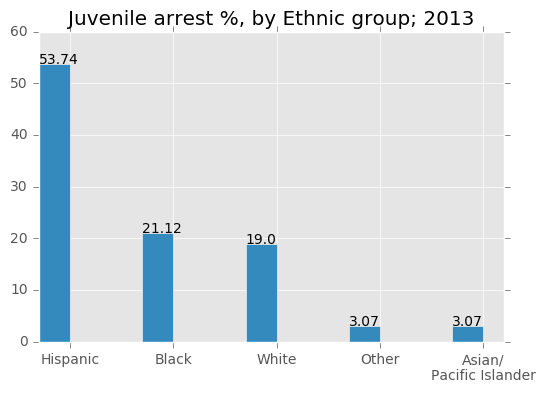

In [155]:
########### Plot 4: Percentage Arrests by Ethnic group
xlabel = list(arrest_df.index); xlabel[4] = 'Asian/\nPacific Islander'
x =  np.arange(0, len(arrest_df.index))
wid = 0.3

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x, arrest_df['arrest %'], wid)

############### annotate bar plot ############### 
#ax.annotate( str(get.height))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.xticks( x+wid, xlabel)
plt.title('Juvenile arrest %, by Ethnic group; 2013')

#plt.savefig('plot4_PercentArrests.png', bbox_inches='tight',pad_inches=.2)
plt.show()

In [32]:
column = df.race_or_ethnicity.value_counts().index.values
column[1] = 'Suppressed'
column[4] = 'Asian/\nPacific Islander'
column

array(['Hispanic', 'Suppressed', 'White', 'Other',
       'Asian/\nPacific Islander'], dtype=object)

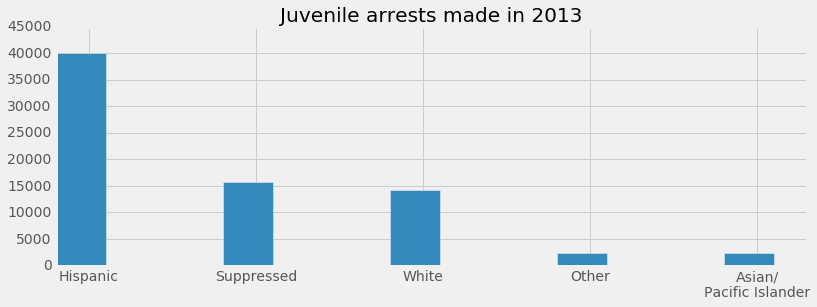

In [37]:
mpl.style.use('fivethirtyeight') 
# number of juveniles per each arrest }

fig, ax = plt.subplots(figsize=(12,4))

x = np.arange(0,df.race_or_ethnicity.unique().size)
wid=0.3

ax.bar(x,df.race_or_ethnicity.value_counts(), wid, label=df.race_or_ethnicity.value_counts().index)
### place labels of bars at bottom, x+0.2 apart
plt.xticks(x+0.2, column)
plt.title('Juvenile arrests made in 2013') ; plt.show()

---
***
#### Playing with Data Frames
(not ALL in Azure Notebook) 
1. look at following 


In [30]:
####### another way of unfolding the DataFrame
####### Index has name 'status_type' ['booked, cited, other], 
####### Columns are MultiIndex :: have levels gender/ethnic , labels, and name 
test = group_disp.count().unstack(level=0)
test

gender                           
race_or_ethnicity Asian/Pacific Islander Black Hispanic Other White
status_type                                                        
booked                               634  8299    16253   816  5167
cited                               1099  5144    16578  1142  5964
other                                555  2300     7236   331  3036

In [32]:
test.index

Index([u'booked', u'cited', u'other'], dtype='object', name=u'status_type')

In [35]:
trans_test = test.gender
trans_test

race_or_ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
status_type,,,,,
booked,634,8299,16253,816,5167
cited,1099,5144,16578,1142,5964
other,555,2300,7236,331,3036


In [36]:
trans_test.columns

Index([u'Asian/Pacific Islander', u'Black', u'Hispanic', u'Other', u'White'], dtype='object', name=u'race_or_ethnicity')

In [38]:
trans_test.index

Index([u'booked', u'cited', u'other'], dtype='object', name=u'status_type')

+ get the row names of Index
